In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)


In [224]:
df1 = pd.read_csv("metadata.tsv", sep = '\t')
df2 = pd.read_csv("expmat.tsv", sep = '\t')

In [225]:
df1.sample(10)

,rowname,infection,batch,agenum,ctnum
374,GSM4602615,1,K,59.0,23.86
263,GSM4602504,1,P,57.0,24.00
145,GSM4602386,1,P,29.0,22.03
473,GSM4602715,0,S,20.0,NaN
124,GSM4602365,1,M,47.0,24.21
316,GSM4602557,1,P,38.0,16.41
322,GSM4602563,1,P,58.0,21.39
5,GSM4602246,1,H,52.0,25.61
128,GSM4602369,1,L,29.0,24.16
134,GSM4602375,1,N,48.0,20.26


In [226]:
df1 =df1.drop(['rowname'],axis = 1)

In [227]:
df2.sample(10)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50
392,GSM4602634,-0.485793,-0.170404,-0.215387,0.024248,0.111405,-0.019339,-0.550128,0.023802,0.219546,-0.296911,0.206542,0.064613,0.075745,0.104899,0.180878,-0.080375,0.053013,-0.728349,-0.639074,-0.180680,-0.157154,-0.343453,-0.402850,0.069283,-0.100433,-0.260335,0.238239,-0.012457,0.088155,-0.066419,-0.514650,-0.037621,0.003800,0.078150,0.007901,-0.328483,-0.280410,-0.213002,0.070928,-0.135961,-0.146387,-0.169866,-0.336764,-0.067399,0.028196,-0.487166,0.192223,-0.183342,0.064460,-0.036754
285,GSM4602526,-0.404314,-0.217463,-0.054472,-0.224585,-0.058988,-0.519119,-0.186322,-0.348109,-0.013215,-0.254739,-0.411872,-0.141919,-0.194825,-0.168146,-0.275395,-0.043828,-0.428535,-0.569257,-0.456534,-0.184923,-0.219442,-0.368842,-0.169124,-0.270180,-0.458341,-0.163861,-0.011827,-0.286526,0.010200,0.033710,-0.184451,-0.126227,0.006500,-0.298311,-0.128603,-0.537854,-0.327853,-0.236854,-0.115366,0.022545,-0.217805,0.043655,-0.278603,-0.022434,-0.088745,-0.260899,0.136413,-0.010143,0.187598,0.232104
5,GSM4602246,-0.110181,-0.139206,-0.341165,0.361251,0.046235,0.332646,-0.143518,0.365992,0.588461,0.007021,0.046774,-0.038743,-0.407037,-0.350590,-0.047482,-0.278448,0.094459,-0.378863,-0.132768,-0.200859,-0.185744,-0.208355,-0.113603,0.391893,0.228048,0.296297,0.645427,0.689928,0.559713,-0.307890,-0.308088,-0.249288,0.022074,0.428914,-0.152097,0.006555,-0.056694,0.085398,-0.081121,-0.169518,-0.045985,-0.358534,0.033540,-0.182250,-0.033447,0.291884,0.025661,-0.159101,-0.276289,0.001188
359,GSM4602600,0.605884,0.291164,0.243814,0.115092,-0.303793,0.362453,0.392955,-0.040077,0.072307,0.249591,-0.250581,-0.006858,-0.087601,-0.048619,0.077309,-0.109732,0.272491,0.284818,0.266493,0.029966,-0.107977,0.088704,0.340859,0.112808,0.182422,0.241292,-0.037321,-0.257367,-0.188508,0.206237,0.451103,0.067768,-0.068499,-0.266727,0.025498,0.139877,0.077924,0.322537,0.137975,0.102783,0.215507,0.174262,0.229470,0.011202,-0.137537,0.119719,-0.050520,0.199125,-0.149393,0.103134
53,GSM4602294,-0.181896,0.010940,-0.058027,-0.314029,-0.093569,-0.350641,-0.005707,-0.066730,-0.191376,-0.136393,0.078269,0.071071,0.163767,0.183755,-0.286837,0.055918,-0.220664,-0.234487,-0.265383,-0.101073,0.053943,0.303789,-0.035572,-0.028506,-0.239543,-0.041598,-0.015091,-0.315311,-0.186288,0.183538,0.112790,0.118260,0.008327,0.010747,0.049769,-0.320030,-0.038334,-0.038343,-0.072083,0.321618,-0.062690,0.162909,0.125209,0.034817,-0.095187,0.054842,-0.043439,0.056426,0.141368,-0.051269
277,GSM4602518,-0.175398,0.047795,0.088491,-0.204744,-0.326430,-0.260739,0.015353,-0.194005,-0.145090,-0.161533,-0.099333,0.056906,0.123298,0.150785,0.191977,0.083455,0.145752,0.396297,0.069576,-0.072203,-0.191016,0.094814,-0.062221,0.019285,-0.066958,0.029832,-0.149460,-0.022356,-0.159907,0.069420,-0.028736,-0.069343,-0.046640,-0.031931,-0.041208,0.221329,-0.060633,-0.093930,-0.118988,-0.032669,-0.059448,0.014104,-0.040464,-0.148793,-0.065816,-0.121694,0.003041,-0.028048,0.168883,-0.227258
1,GSM4602242,0.033998,-0.073510,-0.024664,-0.020609,-0.070523,-0.111419,0.034210,-0.035007,-0.056222,-0.000280,-0.054845,-0.130467,0.027684,-0.094541,-0.057734,0.028927,-0.179387,0.504080,0.377417,0.078216,-0.090854,-0.246436,-0.023644,-0.013750,-0.069868,-0.104694,-0.064105,-0.111447,-0.210790,0.054601,0.004009,-0.143190,-0.123775,-0.171442,-0.205682,-0.313475,0.005984,-0.034748,-0.129028,0.173838,-0.017659,-0.074952,0.019122,0.071927,0.071041,0.121803,-0.043223,0.010535,0.080000,0.242266
62,GSM4602303,-0.391573,-0.246147,-0.422547,-0.196469,-0.221193,-0.194951,-0.206492,-0.379519,-0.085598,-0.292190,-0.325959,-0.188923,-0.235312,-0.265360,-0.237780,0.126127,-0.157043,-0.499170,-0.413590,-0.222284,-0.102525,-0.266699,-0.238514,-0.292093,-0.327878,-0.286142,-0.107972,-0.265279,-0.254344,0.028695,-0.007127,-0.053586,-0.281098,

In [228]:
dataset = pd.concat([df2,df1], axis = 1)

In [229]:
dataset.sample(10)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,batch,agenum,ctnum
472,GSM4602714,-0.091043,0.029247,0.232302,-0.257478,0.183358,-0.089001,-0.354419,0.119278,-0.340786,-0.088454,0.193069,0.169773,0.039310,0.103187,-0.321383,0.147248,-0.305835,-0.641665,-0.554699,-0.013395,-0.210955,-0.123819,-0.358280,-0.028902,-0.359743,-0.165070,-0.183635,-0.182884,0.265437,0.088875,-0.366743,0.137800,0.088981,0.237093,0.233103,0.163007,0.115491,0.067817,-0.078501,-0.017213,-0.092930,-0.050095,-0.257252,0.210758,0.174665,-0.465576,0.085230,-0.313403,-0.017873,-0.152632,0,S,30.0,NaN
384,GSM4602625,-0.301493,-0.063430,-0.044252,-0.319249,-0.048798,-0.355752,-0.183164,-0.080068,-0.089919,-0.241782,-0.023917,-0.132742,-0.080035,-0.007653,-0.193373,0.212582,-0.430307,-0.554872,-0.475106,-0.084341,0.225358,-0.180938,-0.227696,-0.107637,-0.202262,-0.194078,-0.022222,-0.311848,-0.049160,0.211777,-0.176996,-0.102152,-0.103415,-0.149640,-0.035895,-0.263128,-0.019641,-0.169344,-0.313055,0.301479,-0.140781,0.108288,-0.180509,-0.139299,-0.208653,-0.151459,0.123495,0.027182,0.279759,0.382082,1,J,33.0,19.19
37,GSM4602278,0.226507,-0.187684,-0.037670,-0.346880,-0.281841,-0.306977,0.034828,-0.120772,-0.041818,0.008926,-0.149097,-0.088649,-0.198863,-0.193626,-0.146729,-0.028611,0.081712,0.484387,0.445878,-0.050724,-0.218551,0.014087,0.194213,-0.071866,-0.205813,0.068567,0.018934,-0.090953,-0.179915,0.146555,0.192117,-0.145599,-0.106103,0.042322,-0.277396,-0.102519,-0.038019,-0.022510,-0.127932,0.280964,-0.137589,0.020907,-0.046103,-0.192016,-0.272003,0.194789,0.197937,0.194265,-0.029413,0.330092,1,Q,46.0,13.28
411,GSM4602653,0.144313,0.112077,0.208473,0.024928,0.391782,0.290385,0.306046,0.246030,-0.038944,0.159438,0.404538,0.261442,0.107643,0.007983,0.312878,-0.148225,-0.031167,0.622283,0.477259,0.117859,-0.025535,0.166617,0.307970,0.278612,0.351637,0.202106,-0.095409,0.158824,0.331333,-0.053922,0.283700,0.091682,0.233187,0.266303,0.076565,0.108461,0.272613,0.230431,-0.132324,-0.157082,0.118201,0.015944,0.063192,-0.198369,0.083657,0.374402,-0.151241,0.148028,-0.115435,-0.204313,1,Q,61.0,17.56
412,GSM4602654,-0.190314,-0.014410,0.022340,-0.221714,0.238152,-0.181781,-0.162353,0.037929,-0.347527,-0.068223,0.174958,-0.065898,0.122971,0.067158,-0.204710,-0.006721,-0.405874,0.364114,0.225538,0.125898,-0.168590,-0.014691,-0.075888,-0.098411,-0.106759,-0.299501,-0.400095,-0.434040,0.045285,-0.076472,-0.130466,0.013399,-0.057827,-0.120650,0.100777,0.078621,0.171291,0.034551,0.044459,0.015872,-0.058811,-0.235685,-0.083410,-0.191624,-0.094857,0.002688,-0.182459,-0.274405,0.091671,-0.111461,1,Q,51.0,21.58
326,GSM4602567,0.148766,0.024252,0.107890,0.167016,0.067036,0.153177,0.074685,-0.023435,0.040088,0.079259,0.380766,-0.002560,0.033934,0.060208,0.291186,-0.081296,0.435897,0.588141,0.504450,0.125592,-0.243236,0.016388,0.294420,0.180816,0.214907,0.106298,-0.082898,0.329086,-0.085119,-0.108029,0.178926,0.012613,0.023173,-0.106596,-0.046484,0.244170,0.020019,0.029816,0.091511,0.024376,0.142131,0.088305,0.262107,-0.203003,-0.027020,0.215925,-0.000827,0.058722,-0.130761,-0.013028,1,O,39.0,18.68
307,GSM4602548,-0.167559,-0.094666,-0.264527,0.226495,-0.018108,0.213345,-0.230814,-0.003512,0.308487,0.108651,-0.260519,0.108359,-0.169471,-0.140939,0.238613,-0.192449,0.306775,-0.112440,0.092627,0.002802,-0.225217,-0.129734,-0.050029,0.115738,0.181318,0.178405,0.292956,0.451933,-0.037366,-0.317536,-0.275317,0.025466,0.053168,0.123551,-0.113807,0.329052,-0.055274,-0.104824,0.022441,-0.361606,0.116314,-0.161788,0.022587,-0.013226,0.043071,0.122884,0.058508,-0.060133,-0.123705,-0.030329,1,F,52.0,21.48
470,GSM4602712,-0.377647,-0.035956,0.048359,-0.080409,0.186468,-0.267116,-0.187610,-0.029656,-0.144503,0.082228,-0.180201,0.243676,0.101413,0.222666,-0.319545,0.161083,-0.270684,-0.584260,-0.439294,-0.050075,0.010602,-0.172961,-0.

In [230]:
X_train,X_test,y_train,y_test = train_test_split(dataset.drop(['ctnum'], axis = 1),dataset['ctnum'],test_size = 0.25, random_state=42, shuffle = True)

In [231]:
#X_train

In [232]:
#y_train

In [233]:
#X_test

In [234]:
#y_test

In [235]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((363, 54), (363,), (121, 54), (121,))

In [236]:
train = pd.concat([X_train,y_train], axis = 1)

In [237]:
train.sample(10)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,batch,agenum,ctnum
89,GSM4602330,-0.091472,0.015040,-0.006820,0.087048,0.032204,0.096227,0.253079,-0.019479,0.061883,0.142476,-0.236477,0.123710,0.092828,0.091293,0.331626,-0.095246,0.258823,0.336699,0.280466,0.010656,0.086783,-0.295441,0.276972,0.262758,0.357470,0.125194,0.156302,0.312289,0.359983,-0.015921,0.118830,0.140253,0.096770,0.314744,0.098651,0.129038,0.164887,-0.026822,-0.043719,0.286555,-0.015269,0.159291,-0.040046,-0.276291,0.112227,0.240342,-0.123190,0.071673,-0.087019,0.141104,1,O,32.0,14.96
283,GSM4602524,-0.388165,-0.157908,-0.088348,0.107797,-0.324163,-0.065314,-0.281628,0.043994,0.308530,-0.140523,-0.200186,0.027115,-0.156329,-0.150557,0.167880,-0.242170,0.356145,-0.394133,-0.271974,-0.250133,-0.003013,0.047802,-0.035606,0.005499,-0.046660,0.140776,0.371997,0.448024,0.035140,-0.260468,-0.291104,0.071762,0.143384,0.349876,-0.034585,-0.121961,-0.231809,-0.185711,0.121172,0.024789,-0.029717,-0.137302,-0.147190,0.009846,0.023330,0.027974,0.097717,-0.065691,-0.247429,0.146889,1,D,76.0,19.14
387,GSM4602628,0.021963,-0.195683,-0.122744,-0.356421,-0.146716,-0.438857,0.034223,-0.195080,-0.225407,-0.182949,-0.200181,-0.301922,-0.251839,-0.216931,-0.351453,0.017668,-0.370944,-0.203916,-0.151806,-0.178852,-0.129639,-0.171571,-0.091963,-0.282236,-0.334421,-0.233693,-0.193022,-0.462807,-0.293439,0.185721,0.212736,-0.119621,-0.110582,-0.290002,-0.174121,-0.412339,-0.201250,-0.193765,-0.304306,0.051084,-0.187027,-0.081109,-0.184273,-0.030476,-0.081891,-0.004184,0.121026,0.167759,0.241676,0.292124,1,J,72.0,22.47
40,GSM4602281,-0.085659,0.081200,-0.152926,0.196250,-0.225698,0.060148,0.154512,0.155057,0.188518,-0.043321,-0.015734,0.136598,0.126584,0.047509,0.283517,0.160707,0.128785,0.384304,0.369047,0.027852,-0.059680,0.032571,0.213647,0.101100,0.272843,0.112202,0.011045,0.175121,-0.235463,-0.124737,0.146358,0.111795,0.029853,-0.041644,-0.038016,0.066585,0.018874,0.010873,0.141007,-0.345505,0.138262,0.011327,0.112249,-0.196248,-0.111738,0.200471,-0.023175,0.115252,-0.030579,-0.044826,1,Q,51.0,21.64
167,GSM4602408,-0.165551,-0.133941,-0.053377,-0.288049,-0.067687,-0.343196,-0.281459,-0.247685,-0.212352,-0.093148,-0.373904,-0.211431,-0.078789,-0.030836,-0.262245,0.131522,-0.308876,-0.469190,-0.433336,-0.179583,0.106311,0.013555,-0.183594,-0.275752,-0.247354,-0.284259,-0.153739,-0.315448,-0.229437,0.084968,-0.078339,-0.026408,-0.098975,-0.266514,-0.016407,-0.282502,-0.183675,-0.067491,-0.223839,-0.004986,-0.221798,0.022039,-0.110987,-0.018218,-0.298177,-0.108170,0.018753,-0.091997,0.235259,0.317639,1,K,82.0,24.78
32,GSM4602273,-0.426633,-0.241779,-0.018067,-0.189159,-0.032158,-0.151684,-0.219224,-0.131757,-0.277929,-0.232059,-0.057114,-0.030799,-0.009498,-0.030449,-0.310379,-0.029552,-0.322805,-0.100683,-0.117863,-0.105044,-0.180584,-0.094012,-0.197443,-0.391962,-0.147107,-0.307665,-0.153475,-0.182516,-0.078189,-0.158480,-0.314264,-0.084502,-0.099238,-0.195183,-0.108490,-0.059252,-0.159492,-0.129266,-0.141693,-0.073030,-0.076354,-0.078399,-0.127091,-0.083913,-0.039451,-0.094322,0.117416,-0.154151,0.010584,0.144309,1,O,61.0,15.92
184,GSM4602425,-0.383780,-0.077299,-0.186923,0.041083,0.005966,0.142193,-0.178983,-0.038163,0.009502,-0.039904,0.146562,0.061307,0.026326,-0.026793,0.111099,0.044513,0.167848,-0.285690,-0.252872,-0.092108,0.106435,0.180471,-0.115981,-0.096596,-0.006859,0.014337,-0.014326,0.319307,0.083823,-0.076005,-0.331500,0.082190,0.163919,0.080276,-0.026232,0.011325,-0.061564,-0.169868,0.045223,-0.023705,0.119559,-0.034054,-0.156158,0.076634,0.082185,-0.228014,0.224990,-0.220972,0.122725,0.135711,1,Q,24.0,22.54
49,GSM4602290,-0.425987,-0.286292,-0.197499,-0.404480,0.010603,-0.544229,-0.398379,-0.325977,-0.332303,-0.466564,-0.162658,-0.190490,-0.153755,-0.198329,-0.550737,0.065779,-0.511831,-0.592833,-0.540171,-

In [238]:
test = pd.concat([X_test,y_test], axis = 1)

In [239]:
test.sample(10)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,batch,agenum,ctnum
63,GSM4602304,0.300383,0.165111,0.311293,0.146216,0.068416,-0.055484,0.434047,0.009762,0.055755,0.213460,-0.129199,-0.021282,-0.014538,-0.019422,0.125057,-0.000495,0.174655,0.539576,0.493076,0.247032,0.225705,-0.071713,0.305249,0.131065,0.269071,0.173388,0.061170,0.370817,-0.099455,-0.194836,0.360735,0.134967,0.029723,-0.022790,0.057458,0.290553,0.009524,0.210798,-0.020113,-0.234278,0.066406,-0.030405,0.208117,-0.014392,-0.140806,0.367917,-0.139846,0.230045,0.018946,-0.165949,1,F,63.0,25.64
33,GSM4602274,-0.008352,-0.074332,-0.238685,-0.291133,0.253526,-0.248288,-0.040242,-0.237168,-0.392581,-0.109589,0.250027,-0.160036,0.110280,0.092726,-0.382831,0.202085,-0.505796,-0.057916,-0.048630,0.047847,-0.134698,-0.086962,-0.014192,-0.272820,-0.196677,-0.417360,-0.266756,-0.407957,-0.131315,0.120201,0.051033,0.140593,-0.165418,-0.150856,-0.036406,-0.141848,0.059393,-0.024561,-0.288670,0.299573,-0.136177,0.276685,-0.096220,-0.030059,-0.184089,-0.070913,0.011182,0.042665,0.299173,0.212209,1,O,68.0,19.29
321,GSM4602562,0.196108,0.184741,0.240640,0.186963,0.043055,0.130007,0.169069,-0.088259,-0.167480,0.011863,0.196072,-0.211114,0.178843,0.158680,-0.004229,0.172403,0.032058,0.426756,0.407598,0.075283,0.246561,0.135616,0.032978,0.110913,0.139430,-0.034645,-0.304947,-0.115580,-0.171373,-0.007966,0.057994,-0.059130,-0.081086,-0.148473,0.037557,0.005904,-0.018099,0.009827,0.125414,0.076916,0.048656,-0.105071,0.026596,0.057323,-0.011600,0.041553,0.119724,-0.012226,0.151572,-0.008518,1,P,51.0,20.19
75,GSM4602316,-0.469354,-0.214750,-0.423224,0.089534,-0.096437,-0.300031,-0.373430,-0.191017,0.163635,-0.244531,-0.417388,-0.074059,-0.173748,-0.193993,-0.059206,-0.099908,0.011401,-0.317120,-0.298444,-0.287883,-0.179896,-0.308877,-0.245749,-0.195887,-0.288203,-0.259033,0.032838,-0.066770,-0.036387,-0.156781,-0.300011,-0.105550,-0.086840,-0.150847,-0.037375,-0.278797,-0.341467,-0.295519,0.018739,0.020843,-0.089555,-0.100426,-0.192766,0.027104,-0.128794,-0.316680,0.144848,-0.102809,0.160833,0.273317,1,F,49.0,18.45
84,GSM4602325,-0.442029,-0.195871,-0.131199,-0.226081,0.160782,-0.267065,-0.303221,-0.086990,-0.221635,-0.165284,0.212191,-0.152367,-0.124899,-0.099892,-0.362471,0.048329,-0.174129,-0.569960,-0.486929,-0.118262,-0.142664,-0.212343,-0.320563,-0.148059,-0.240632,-0.302296,-0.090195,-0.137958,-0.104315,-0.011962,-0.290974,-0.115473,-0.071946,-0.124814,-0.165833,-0.222203,-0.190820,-0.280320,-0.035562,-0.206239,-0.088434,-0.095305,-0.243233,0.140984,0.070239,-0.254553,-0.038852,-0.201851,0.198557,0.297899,1,O,58.0,23.72
467,GSM4602709,-0.096205,0.142203,0.187928,0.073818,0.065709,-0.005982,-0.218879,0.199719,-0.024685,0.133134,0.053935,0.191910,0.160446,0.143088,0.069518,0.220297,0.112397,-0.500041,-0.431032,0.055100,-0.053678,-0.016758,-0.122662,0.264247,-0.014505,0.035568,-0.050545,0.372765,0.182892,0.092612,-0.352321,0.171630,0.281503,0.391638,0.098663,0.467418,0.155965,0.157693,0.299451,0.086396,0.040386,0.093774,-0.154743,-0.066949,-0.001092,-0.232739,0.007310,-0.279372,0.072705,-0.188623,0,S,44.0,NaN
192,GSM4602433,0.248459,0.084474,0.188981,0.241604,0.112756,0.282309,0.084733,0.068797,0.071220,0.172193,-0.179004,0.267689,0.275111,0.203209,0.043290,-0.059272,0.134102,-0.275280,-0.182620,0.152791,0.179085,0.272990,0.199352,0.113798,0.183426,0.076607,0.045364,-0.137167,0.020573,0.068169,0.121588,0.191605,0.058985,0.097058,0.234069,0.290988,0.228858,0.090082,0.265584,-0.220272,0.130966,0.111056,0.191471,0.190584,0.254496,0.093978,-0.110021,-0.065188,-0.053231,-0.448615,1,Q,26.0,21.36
425,GSM4602667,0.399879,0.127090,0.279998,0.021892,0.025227,-0.055228,0.203161,-0.218856,-0.090108,0.056907,0.018175,-0.040763,0.087335,0.068631,0.068983,0.118244,-0.018989,0.118657,0.150414,0.098606,0.063900,0.107347,-0.099508,0.084024,-

In [240]:
## Here we will check the percentage of nan values present in each feature for our soul satisfaction
## 1 -step make the list of features which has missing values
if_nan_feat=[features for features in train.columns if train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in if_nan_feat:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')


agenum 0.0909  % missing values
ctnum 0.135  % missing values


<AxesSubplot:>

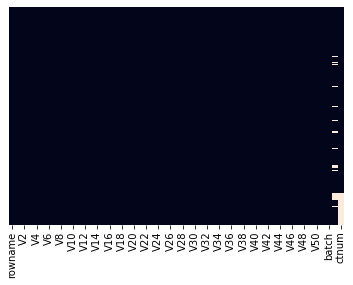

In [241]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [242]:
# list of numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()
#all features  and labels are numerical

Number of numerical variables:  53


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum,ctnum
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,-0.447024,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,1,50.0,22.81
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.043612,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,1,62.0,19.35
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.346804,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,1,72.0,21.34
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.271755,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,1,30.0,25.36
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,-0.197066,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,1,35.0,24.41


In [243]:
# list of numerical variables
categorical_features = [feature for feature in train.columns if train[feature].dtypes == 'O']

print('Number of categorical features: ', len(categorical_features))

# visualise the numerical categorical
train[categorical_features].head()


Number of categorical features:  2


,rowname,batch
397,GSM4602639,L
57,GSM4602298,Q
286,GSM4602527,D
132,GSM4602373,N
406,GSM4602648,M


# Handling Missing values

In [244]:
train['agenum'].dropna().sample(train['agenum'].isnull().sum(),random_state=0)


97     22.0
74     44.0
301    40.0
472    30.0
471    54.0
165    75.0
366    57.0
245    37.0
219    78.0
434    51.0
263    57.0
204    65.0
404    42.0
199    59.0
327    50.0
269    57.0
197    57.0
194    62.0
351    86.0
267    30.0
47     51.0
14     86.0
316    38.0
58     78.0
162    56.0
21     23.0
308    71.0
288    36.0
315    39.0
133    27.0
240    71.0
216    33.0
230    77.0
Name: agenum, dtype: float64

In [245]:
test['agenum'].dropna().sample(test['agenum'].isnull().sum(),random_state=0)

175    37.0
362    78.0
467    44.0
250    63.0
479    41.0
192    26.0
Name: agenum, dtype: float64

In [246]:
train[train['agenum'].isnull()].index

Int64Index([424, 420, 346, 314, 354, 109, 429, 422, 139, 349, 369, 416, 123,
            357, 423, 419, 275, 179, 127, 352, 221, 415, 279, 421, 417, 295,
            428, 166, 363, 252, 276, 443, 413],
           dtype='int64')

In [247]:
test[test['agenum'].isnull()].index

Int64Index([418, 427, 176, 425, 414, 426], dtype='int64')

In [248]:
def impute_nan(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the nan value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [249]:
mode=train.agenum.mode()
mode

0    51.0
Name: agenum, dtype: float64

In [250]:
mode_test=test.agenum.mode()
mode_test

0    57.0
Name: agenum, dtype: float64

In [251]:
impute_nan(train,"agenum",mode)

In [252]:
impute_nan(test,"agenum",mode_test)

In [253]:
train.head()

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,batch,agenum,ctnum,agenum_mode,agenum_random
397,GSM4602639,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,-0.447024,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,1,L,50.0,22.81,50.0,50.0
57,GSM4602298,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.043612,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,1,Q,62.0,19.35,62.0,62.0
286,GSM4602527,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.346804,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,1,D,72.0,21.34,72.0,72.0
132,GSM4602373,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.271755,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,1,N,30.0,25.36,30.0,30.0
406,GSM4602648,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,-0.197066,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,1,M,35.0,24.41,35.0,35.0


In [267]:
mode_train=train.ctnum.mode()
mode_train

0    17.73
Name: ctnum, dtype: float64

In [255]:
mode_test=test.ctnum.mode()
mode_test

0    20.24
1    25.43
Name: ctnum, dtype: float64

In [256]:
impute_nan(test,"ctnum",mode_test)

In [268]:
impute_nan(train,"ctnum",mode_train)

In [269]:
train.isnull().sum()

rowname           0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
V29               0
V30               0
V31               0
V32               0
V33               0
V34               0
V35               0
V36               0
V37               0
V38               0
V39               0
V40               0
V41               0
V42               0
V43               0
V44               0
V45               0
V46               0
V47               0
V48               0
V49               0


In [270]:
train['ctnum_random']

397    22.8100
57     19.3500
286    21.3400
132    25.3600
406    24.4100
24     17.6400
17     25.5000
403    19.1100
66     23.7800
424    22.3600
420    19.1800
94     14.7900
173    20.9100
225    29.6900
23     23.2100
249    22.0600
450    21.9300
245    24.9600
5      25.6100
116    14.5000
45     18.4000
16     15.5000
447    21.4600
346    24.2800
3      18.9100
203    20.4800
310    23.8000
60     20.6900
110    21.7600
404    26.3200
405    19.4400
29     21.1900
172    18.6400
155    24.8097
26     17.3100
7      25.9100
440    20.2200
108    26.3400
37     13.2800
157    22.8300
451    24.6500
118    17.0900
114    17.0800
441    20.5900
314    20.0200
144    19.7100
358    27.3000
368    22.8200
182    19.9400
253    25.8700
262    20.2700
432    30.5400
141    22.1400
354    21.0800
67     21.5500
208    23.9000
168    23.1200
364    25.6408
237    22.0000
304    18.9200
109    23.5100
449    22.1200
145    22.0300
248    25.1800
152    18.7100
204    18.2900
351    29.

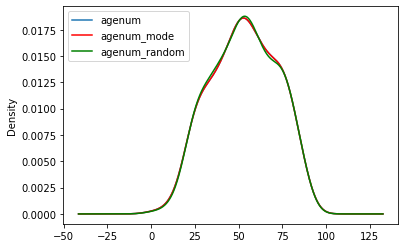

In [271]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['agenum'].plot(kind='kde', ax=ax)
train.agenum_mode.plot(kind='kde', ax=ax, color='red')
train.agenum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

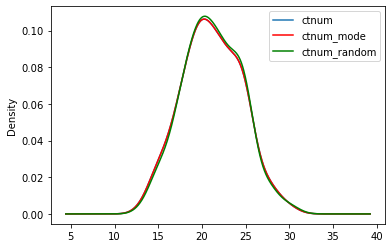

In [272]:
fig = plt.figure()
ax = fig.add_subplot(111)
train['ctnum'].plot(kind='kde', ax=ax)
train.ctnum_mode.plot(kind='kde', ax=ax, color='red')
train.ctnum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

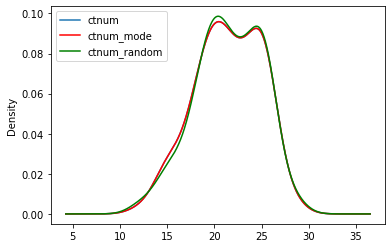

In [273]:
fig = plt.figure()
ax = fig.add_subplot(111)
test['ctnum'].plot(kind='kde', ax=ax)
test.ctnum_mode.plot(kind='kde', ax=ax, color='red')
test.ctnum_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [274]:
test.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'batch', 'agenum', 'ctnum', 'agenum_mode', 'agenum_random',
       'ctnum_mode', 'ctnum_random'],
      dtype='object')

In [275]:
train.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'batch', 'agenum', 'ctnum', 'agenum_mode', 'agenum_random',
       'ctnum_mode', 'ctnum_random'],
      dtype='object')

In [276]:
train = train.drop(['agenum', 'ctnum', 'agenum_mode','ctnum_mode'], axis = 1)

In [277]:
train.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'batch', 'agenum_random', 'ctnum_random'],
      dtype='object')

In [278]:
test = test.drop(['agenum', 'ctnum', 'agenum_mode','ctnum_mode'], axis = 1)

In [279]:
test.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'batch', 'agenum_random', 'ctnum_random'],
      dtype='object')

# Handling Categorical features

In [280]:
train['batch'].unique()

array(['L', 'Q', 'D', 'N', 'M', 'J', 'F', 'R', 'T', 'C', 'I', 'S', 'H',
       'A', 'G', 'E', 'P', 'K', 'O', 'B', 'U'], dtype=object)

In [281]:
train.batch.value_counts().sort_values(ascending = False)

Q    43
P    40
L    35
J    21
O    19
E    19
A    17
R    17
F    16
H    16
C    14
D    14
M    13
U    12
G    11
S    11
N    11
B    11
T     8
K     8
I     7
Name: batch, dtype: int64

In [282]:
train = pd.get_dummies(train,columns = ['batch'])

In [283]:
train

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_D,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U
397,GSM4602639,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,-0.447024,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,1,50.0,22.8100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
57,GSM4602298,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.043612,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,1,62.0,19.3500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
286,GSM4602527,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.346804,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,1,72.0,21.3400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,GSM4602373,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.271755,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,1,30.0,25.3600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
406,GSM4602648,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,-0.197066,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,1,35.0,24.4100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,GSM4602265,0.446011,-0.089810,-0.153558,-0.107140,0.015655,-0.080458,0.363418,0.036908,0.054323,0.123027,-0.270963,-0.185958,-0.253433,-0.159495,-0.176409,-0.059655,-0.251752,0.499338,0.480976,-0.092612,-0.020802,-0.323851,0.260553,-0.204937,-0.056777,0.038379,0.092486,-0.233184,0.019472,0.231034,0.466537,-0.123927,-0.071506,-0.140264,-0.126555,-0.294120,-0.070676,-0.002093,-0.209596,-0.026968,-0.201948,0.120660,-0.002375,-0.035685,-0.180633,0.365192,0.125957,0.241923,-0.026990,0.157115,1,33.0,17.6400,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17,GSM4602258,0.089816,0.038569,-0.123353,-0.035499,-0.210914,0.302666,0.107346,-0.103381,-0.149694,0.069318,0.067901,0.061204,0.000087,-0.009825,0.191076,-0.055419,0.049251,0.447215,0.400469,0.090635,0.105572,-0.138397,0.088626,0.037610,0.044147,0.039969,-0.181930,0.226095,-0.

In [284]:
test = pd.get_dummies(test,columns = ['batch'])

In [285]:
test

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U
418,GSM4602660,0.416963,0.181283,0.064580,-0.256586,-0.022616,-0.317925,0.376913,0.086584,-0.255495,0.096489,-0.286351,-0.114948,0.001124,0.134171,-0.265603,0.177838,-0.441729,0.020358,0.087675,0.068682,0.235104,0.074740,0.110917,-0.122963,-0.223246,-0.143623,-0.325415,-0.324105,-0.142395,0.128452,0.382080,0.031623,-0.168227,-0.148536,-0.015775,0.246351,0.244122,0.269660,-0.268293,0.075639,-0.200756,0.267893,0.087760,-0.226848,-0.319698,0.276343,0.060116,0.060700,0.245187,0.187172,1,37.0,28.4300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
474,GSM4602716,0.199633,0.206295,0.288382,-0.150975,0.394386,0.075909,-0.368996,0.323212,0.079250,0.018757,0.367188,0.300875,0.203676,0.284831,0.042250,0.185306,-0.136521,-0.689719,-0.562376,0.114065,-0.050902,0.106484,-0.254884,0.234786,-0.120460,0.076061,0.239881,0.379393,0.458152,0.294915,-0.333020,0.205415,0.201596,0.396601,0.239581,0.380919,0.335343,0.153839,0.074259,0.343512,-0.002896,0.137697,-0.136050,-0.012642,0.095101,-0.404423,0.115995,-0.187145,0.095741,0.022223,0,24.0,20.4400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
181,GSM4602422,-0.431797,-0.050736,0.030278,-0.117923,0.246983,-0.160531,-0.197276,0.083967,0.028719,-0.148602,-0.088160,0.107166,0.197034,0.119609,-0.131366,-0.031207,-0.265136,-0.075624,-0.288574,0.108118,0.092281,0.194807,-0.190713,-0.036634,-0.144768,-0.204434,0.040556,-0.036747,0.438440,0.081331,-0.313056,0.200570,0.135486,0.205295,0.218619,0.173364,0.000267,-0.128728,-0.127317,0.092619,0.004859,0.071365,-0.096718,0.017100,0.219707,-0.222803,0.037870,-0.148073,0.197723,0.057452,1,31.0,15.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
446,GSM4602688,-0.379012,0.039950,0.292831,0.174339,0.256258,-0.020767,-0.409595,0.085018,0.011241,0.117534,0.083304,0.273789,0.057251,0.100704,0.369484,0.089537,0.216078,-0.522863,-0.467919,0.038392,-0.029776,-0.077510,-0.193034,0.255283,0.180226,0.127704,0.048348,0.507239,0.269196,-0.008447,-0.435819,0.089994,0.335597,0.505068,0.144277,0.402309,0.273659,0.128341,0.033657,0.177969,0.156710,-0.078719,-0.240110,0.025887,0.033908,-0.264123,-0.006608,-0.187606,-0.146445,-0.155532,0,22.0,24.1700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
297,GSM4602538,0.451459,-0.048828,-0.089349,-0.151467,0.136524,-0.169697,0.116059,-0.235683,-0.048781,0.168612,0.025998,-0.209560,-0.122731,0.013534,-0.037159,-0.029747,-0.163304,0.337978,0.319980,0.008199,0.052676,0.125165,0.033125,-0.083027,-0.144659,-0.027197,-0.035691,-0.220076,-0.125586,0.209748,0.382243,0.066195,-0.053133,-0.314604,-0.199561,-0.429845,-0.041083,0.043032,0.012252,0.323018,-0.142087,0.137840,0.005791,0.056885,-0.185860,0.162456,-0.015781,0.221084,0.204374,0.190762,1,70.0,25.5300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
148,GSM4602389,0.517892,0.166558,0.063383,0.132554,-0.194953,0.251701,0.468951,0.356290,0.119660,0.310991,-0.194907,0.277356,0.150370,0.132056,0.328458,-0.075855,0.131719,0.478898,0.431685,0.042434,0.000626,-0.088831,0.307964,0.119159,0.426711,0.185055,0.084930,0.146953,0.386992,-0.028986,0.384665,0.130898,0.135419,0.274745,0.104940,0.404122,0.155519,0.249240,0.014083,0.202276,0.174579,0.058899,0.184781,-0.105251,0.040851,0.343948,0.040726,0.191944,-0.298300,-0.167438,1,20.0,24.1700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
380,GSM4602621,0.196697,-0.125266,-0.044279,-0.382407,-0.187755,-0.502705,0.158471,-0.153866,-0.245726,-0.059669,-0.252144,-0.195650,-0.198259,-0.106760,-0.475754,0.073523,-0.558932,-0.163148,-0.145283,-0.094519,0.099325,-0.169790,-0.014395,-0.385714,-0.281440,-0.320440,-0.119550,-0.521684,-0.177233,0.230835,0.274795,-0.110079,-0.183374,-0.270289,-0.183457,-0.374626,-0.010

# Dichotomizing the ctnum by its median value

In [286]:
train['ctnum_random'].median()

21.11

In [287]:
train.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'agenum_random', 'ctnum_random', 'batch_A', 'batch_B',
       'batch_C', 'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H',
       'batch_I', 'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N',
       'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T',
       'batch_U'],
      dtype='object')

In [288]:
def median_status(value):
      if value <= train['ctnum_random'].median():
        return 0
      else:
        return 1

train['ctnum_median_status'] = train['ctnum_random'].map(median_status)
#test['ctnum_median_status'] = test['ctnum_random'].map(median_status)

In [289]:
train.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'agenum_random', 'ctnum_random', 'batch_A', 'batch_B',
       'batch_C', 'batch_D', 'batch_E', 'batch_F', 'batch_G', 'batch_H',
       'batch_I', 'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N',
       'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T',
       'batch_U', 'ctnum_median_status'],
      dtype='object')

In [290]:
def median_status(value):
      if value <= test['ctnum_random'].median():
        return 0
      else:
        return 1

test['ctnum_median_status'] = test['ctnum_random'].map(median_status)

In [291]:
test.columns

Index(['rowname', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40',
       'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50',
       'infection', 'agenum_random', 'ctnum_random', 'batch_A', 'batch_B',
       'batch_C', 'batch_E', 'batch_F', 'batch_G', 'batch_H', 'batch_I',
       'batch_J', 'batch_K', 'batch_L', 'batch_M', 'batch_N', 'batch_O',
       'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_T', 'batch_U',
       'ctnum_median_status'],
      dtype='object')

In [292]:
train.sample(5)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_D,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
392,GSM4602634,-0.485793,-0.170404,-0.215387,0.024248,0.111405,-0.019339,-0.550128,0.023802,0.219546,-0.296911,0.206542,0.064613,0.075745,0.104899,0.180878,-0.080375,0.053013,-0.728349,-0.639074,-0.180680,-0.157154,-0.343453,-0.402850,0.069283,-0.100433,-0.260335,0.238239,-0.012457,0.088155,-0.066419,-0.514650,-0.037621,0.003800,0.078150,0.007901,-0.328483,-0.280410,-0.213002,0.070928,-0.135961,-0.146387,-0.169866,-0.336764,-0.067399,0.028196,-0.487166,0.192223,-0.183342,0.064460,-0.036754,1,78.0,25.46,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
329,GSM4602570,0.118646,0.158404,0.065435,-0.100482,-0.256014,0.086137,-0.052287,-0.154624,-0.030914,-0.014676,-0.018256,-0.084329,0.113656,0.024166,-0.099013,0.174800,0.202362,0.380052,0.172617,-0.007352,0.001799,0.017321,-0.024807,0.081507,-0.068972,-0.074602,-0.185385,-0.395044,-0.250289,0.034450,0.062537,-0.022938,-0.171039,-0.213278,0.016180,-0.249221,0.092264,0.014464,-0.009284,0.186785,-0.021003,0.039287,0.029334,0.009523,-0.206333,-0.063087,0.014733,-0.045183,0.121273,0.081694,1,64.0,15.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
264,GSM4602505,0.293892,0.148435,0.104996,0.211075,0.217704,0.252421,0.186138,0.165030,0.325615,0.321530,0.293261,0.183230,0.022997,0.046705,0.432129,-0.128000,0.447056,0.518657,0.437617,0.043996,-0.159955,0.072011,0.283162,0.332221,0.420273,0.279179,0.195143,0.453992,0.271824,-0.124986,0.102541,-0.057475,0.107470,0.123259,0.067263,0.359933,0.107421,0.062287,0.020036,0.242516,0.197115,0.086293,0.250355,-0.135750,0.148754,0.323655,-0.101940,0.216432,-0.108637,-0.018673,1,52.0,20.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
306,GSM4602547,-0.006214,0.020756,-0.097219,-0.301688,-0.245728,-0.164781,0.010877,-0.046647,-0.221165,-0.135552,-0.380056,-0.096645,-0.188129,-0.152476,-0.096843,0.010222,-0.274999,0.101769,0.046165,-0.093688,0.049824,-0.065345,-0.032548,-0.176202,-0.155719,-0.118658,-0.073217,-0.265028,-0.138389,-0.017937,-0.055135,-0.105612,-0.040371,-0.198428,-0.133244,-0.236840,-0.156252,-0.172926,-0.248804,-0.004226,-0.084612,-0.130784,-0.059828,0.024505,-0.079549,-0.200855,0.033195,-0.073770,0.163865,0.030909,1,89.0,15.87,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
350,GSM4602591,-0.569692,-0.229663,-0.284979,-0.281434,-0.245485,-0.192891,-0.406348,-0.279150,-0.357703,-0.401797,-0.219487,-0.137271,-0.093219,-0.197284,-0.235563,-0.001205,-0.027190,-0.613807,-0.560747,-0.078263,0.056727,0.036123,-0.347544,-0.292187,-0.386158,-0.360361,-0.351241,-0.371600,-0.218994,-0.110286,-0.374848,-0.048376,-0.149459,-0.247347,-0.068640,-0.435707,-0.364910,-0.340721,0.138042,-0.182167,-0.010388,-0.134861,-0.349808,0.234444,-0.041945,-0.511144,0.161791,-0.316121,0.021795,-0.034720,1,81.0,23.46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [293]:
test.sample(5)

,rowname,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum_random,ctnum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
15,GSM4602256,-0.033934,0.146984,-0.103450,0.359065,-0.077844,0.356982,0.084615,0.169465,0.474751,0.234196,0.015199,0.146508,-0.185334,-0.020618,0.361892,-0.303357,0.360391,0.376611,0.332215,-0.066982,-0.256815,-0.246806,0.260320,0.294935,0.361946,0.351557,0.470827,0.592521,0.426959,-0.281322,-0.200467,-0.020333,0.316575,0.399431,0.105440,0.383299,0.103386,0.087244,0.024590,-0.153209,0.190005,-0.166718,0.154916,-0.191628,0.043243,0.324162,0.021341,0.031997,-0.312874,0.260947,1,50.0,23.95,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
63,GSM4602304,0.300383,0.165111,0.311293,0.146216,0.068416,-0.055484,0.434047,0.009762,0.055755,0.213460,-0.129199,-0.021282,-0.014538,-0.019422,0.125057,-0.000495,0.174655,0.539576,0.493076,0.247032,0.225705,-0.071713,0.305249,0.131065,0.269071,0.173388,0.061170,0.370817,-0.099455,-0.194836,0.360735,0.134967,0.029723,-0.022790,0.057458,0.290553,0.009524,0.210798,-0.020113,-0.234278,0.066406,-0.030405,0.208117,-0.014392,-0.140806,0.367917,-0.139846,0.230045,0.018946,-0.165949,1,63.0,25.64,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
148,GSM4602389,0.517892,0.166558,0.063383,0.132554,-0.194953,0.251701,0.468951,0.356290,0.119660,0.310991,-0.194907,0.277356,0.150370,0.132056,0.328458,-0.075855,0.131719,0.478898,0.431685,0.042434,0.000626,-0.088831,0.307964,0.119159,0.426711,0.185055,0.084930,0.146953,0.386992,-0.028986,0.384665,0.130898,0.135419,0.274745,0.104940,0.404122,0.155519,0.249240,0.014083,0.202276,0.174579,0.058899,0.184781,-0.105251,0.040851,0.343948,0.040726,0.191944,-0.298300,-0.167438,1,20.0,24.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
377,GSM4602618,-0.560380,-0.382795,-0.142110,-0.245278,0.054157,-0.518032,-0.184470,-0.016199,0.056838,-0.361490,-0.005819,-0.087143,-0.314384,-0.233804,-0.287925,-0.053314,-0.230878,-0.604296,-0.482741,-0.253876,-0.238320,-0.088587,-0.346191,-0.289347,-0.431171,-0.195379,0.220246,-0.065461,0.033845,-0.028437,-0.308780,-0.038109,-0.012322,0.018787,-0.104140,-0.450204,-0.402031,-0.330749,-0.111023,0.021420,-0.196791,-0.028394,-0.356211,0.069472,-0.126672,-0.138682,0.165053,-0.171043,0.005461,0.368240,1,63.0,24.33,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
268,GSM4602509,0.415647,0.208529,0.081196,0.073187,0.135048,0.187546,0.244725,0.020458,-0.072181,0.218011,0.115068,0.183541,0.223459,0.230268,0.006034,0.241427,-0.155322,0.197581,0.281240,0.255486,0.317684,0.164132,0.262128,0.157298,0.199248,0.041086,-0.219678,0.148069,0.021648,0.173110,0.298393,0.148161,0.051100,0.093412,0.093719,0.278732,0.278352,0.163306,-0.271409,0.025501,-0.059674,0.324565,0.243195,-0.029036,0.001228,0.286599,-0.145267,0.266504,0.173456,0.102447,1,64.0,25.65,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [294]:
X_train = train.drop(['ctnum_random','rowname','batch_D'], axis = 1)

In [295]:
y_train = train['ctnum_random']

In [296]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,infection,agenum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_H,batch_I,batch_J,batch_K,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_T,batch_U,ctnum_median_status
397,-0.330218,0.010943,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,-0.214529,-0.107121,0.259527,0.043794,0.189793,0.221014,-0.005179,0.057724,-0.267634,-0.483623,-0.447024,0.009653,-0.235960,0.126804,-0.252050,0.025138,-0.078163,-0.147870,-0.156324,-0.074290,0.156958,0.021454,-0.251038,0.077306,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068635,-0.042817,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,-0.146563,0.013029,-0.131632,1,50.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
57,0.426675,0.201063,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,-0.149196,0.093459,0.054202,-0.091866,0.021664,0.062931,-0.162113,0.025513,-0.307262,0.057044,0.043612,0.049918,0.213271,0.022896,0.161115,-0.090165,-0.002233,-0.210391,-0.159603,-0.476597,-0.156384,0.233344,0.215493,0.051197,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.046619,-0.115272,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,0.053134,0.179474,0.139848,1,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
286,-0.449942,-0.190835,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,0.259484,-0.207055,-0.369900,-0.147031,-0.222059,-0.214122,0.049139,-0.188954,0.331578,-0.488139,-0.346804,-0.172344,-0.252019,0.152478,-0.171075,0.084777,0.007003,0.121134,0.298425,0.258907,-0.286528,-0.183427,-0.370122,-0.193184,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.251992,0.178245,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,-0.184023,-0.180516,-0.115021,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
132,-0.385247,-0.206050,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.151738,-0.266959,-0.330026,-0.120815,-0.291226,-0.178578,-0.302082,0.132234,-0.288862,-0.405542,-0.271755,-0.042374,0.157975,0.065657,-0.139909,-0.174547,-0.239952,-0.280853,0.022043,-0.232831,-0.197342,-0.028821,-0.272334,-0.133461,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,-0.296502,-0.191395,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,-0.233459,0.179042,0.272707,1,30.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
406,0.008941,-0.073164,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.281460,-0.125080,-0.118551,-0.256500,0.003577,0.008358,-0.269961,0.120601,-0.249943,-0.086073,-0.197066,0.048850,-0.042623,-0.117136,0.068351,-0.400203,-0.293717,-0.281189,-0.185866,-0.354431,-0.298881,0.084251,0.018540,0.001034,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.145581,-0.072197,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,-0.027145,0.207186,0.133435,1,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
24,0.446011,-0.089810,-0.153558,-0.107140,0.015655,-0.080458,0.363418,0.036908,0.054323,0.123027,-0.270963,-0.185958,-0.253433,-0.159495,-0.176409,-0.059655,-0.251752,0.499338,0.480976,-0.092612,-0.020802,-0.323851,0.260553,-0.204937,-0.056777,0.038379,0.092486,-0.233184,0.019472,0.231034,0.466537,-0.123927,-0.071506,-0.140264,-0.126555,-0.294120,-0.070676,-0.002093,-0.209596,-0.026968,-0.201948,0.120660,-0.002375,-0.035685,-0.180633,0.365192,0.125957,0.241923,-0.026990,0.157115,1,33.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
17,0.089816,0.038569,-0.123353,-0.035499,-0.210914,0.302666,0.107346,-0.103381,-0.149694,0.069318,0.067901,0.061204,0.000087,-0.009825,0.191076,-0.055419,0.049251,0.447215,0.400469,0.090635,0.105572,-0.138397,0.088626,0.037610,0.044147,0.039969,-0.181930,0.226095,-0.033088,-0.157106,0.034714,-0.121165,-0.084738,0.019504,-0.048536,0.334078,0.040241,0.016725,-0.026020,-0.233622,0.109794,-0.001072,0.0

In [297]:
X_test = test.drop(['ctnum_random','rowname'], axis = 1)

In [298]:
y_test = test['ctnum_random']

In [299]:
scaling_feature=[feature for feature in X_train.columns ]
len(scaling_feature)

73

In [300]:
scaling_feature

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'infection',
 'agenum_random',
 'batch_A',
 'batch_B',
 'batch_C',
 'batch_E',
 'batch_F',
 'batch_G',
 'batch_H',
 'batch_I',
 'batch_J',
 'batch_K',
 'batch_L',
 'batch_M',
 'batch_N',
 'batch_O',
 'batch_P',
 'batch_Q',
 'batch_R',
 'batch_S',
 'batch_T',
 'batch_U',
 'ctnum_median_status']

In [301]:
feature_scale=[feature for feature in X_train.columns]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [302]:
scaler.transform(X_train[feature_scale])

array([[0.2153492 , 0.50705908, 0.27310052, ..., 0.        , 0.        ,
        1.        ],
       [0.8057128 , 0.75432576, 0.49914703, ..., 0.        , 0.        ,
        0.        ],
       [0.12196618, 0.24463078, 0.58201289, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.47399153, 0.67148693, 0.55705421, ..., 0.        , 0.        ,
        1.        ],
       [0.42183381, 0.40892229, 0.40911633, ..., 0.        , 0.        ,
        0.        ],
       [0.87637933, 0.76314   , 0.8371173 , ..., 0.        , 0.        ,
        0.        ]])

In [303]:
scaler.transform(X_test[feature_scale])

array([[ 0.79813715,  0.72860002,  0.60649357, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.62862355,  0.76113097,  0.87764499, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1361191 ,  0.42683987,  0.56493495, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.53956725,  0.47042729,  0.66191557, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16212768,  0.05310628, -0.0181821 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.87806271,  0.68346922,  0.5282658 , ...,  0.        ,
         0.        ,  0.        ]])

# Feature selection

In [304]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [305]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [306]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [307]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]
# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 73
selected features: 50
features with coefficients shrank to zero: 23


In [308]:
selected_feat

Index(['V1', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V15',
       'V18', 'V21', 'V22', 'V24', 'V26', 'V28', 'V29', 'V31', 'V33', 'V34',
       'V35', 'V36', 'V37', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46',
       'V47', 'agenum_random', 'batch_A', 'batch_B', 'batch_C', 'batch_E',
       'batch_F', 'batch_G', 'batch_H', 'batch_L', 'batch_M', 'batch_N',
       'batch_O', 'batch_P', 'batch_Q', 'batch_R', 'batch_S', 'batch_U',
       'ctnum_median_status'],
      dtype='object')

In [309]:
X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

In [310]:
X_train.head()

,V1,V3,V4,V5,V6,V7,V8,V11,V12,V13,V15,V18,V21,V22,V24,V26,V28,V29,V31,V33,V34,V35,V36,V37,V40,V41,V42,V43,V44,V45,V46,V47,agenum_random,batch_A,batch_B,batch_C,batch_E,batch_F,batch_G,batch_H,batch_L,batch_M,batch_N,batch_O,batch_P,batch_Q,batch_R,batch_S,batch_U,ctnum_median_status
397,-0.330218,-0.210595,0.042186,0.239706,-0.086893,-0.154712,0.084187,0.259527,0.043794,0.189793,-0.005179,-0.483623,-0.235960,0.126804,0.025138,-0.147870,-0.074290,0.156958,-0.251038,0.072876,-0.002462,0.145036,0.173432,0.124646,0.068867,0.040792,-0.091723,-0.136621,-0.065396,0.001392,-0.151642,-0.004632,50.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
57,0.426675,-0.024022,-0.013352,0.077604,0.044928,0.296684,-0.264555,0.054202,-0.091866,0.021664,-0.162113,0.057044,0.213271,0.022896,-0.090165,-0.210391,-0.476597,-0.156384,0.215493,0.023161,-0.235664,0.027635,-0.183999,0.050380,0.012858,-0.002257,0.049109,0.094898,0.112702,0.000115,0.019317,-0.070527,62.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
286,-0.449942,0.044374,0.144829,-0.079280,-0.086654,-0.303872,-0.098651,-0.369900,-0.147031,-0.222059,0.049139,-0.488139,-0.252019,0.152478,0.084777,0.121134,0.258907,-0.286528,-0.370122,-0.027064,-0.146378,-0.155955,-0.411870,-0.139977,-0.260547,-0.120370,-0.213245,-0.203448,0.122401,0.079855,-0.198764,0.233642,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
132,-0.385247,-0.239616,-0.120262,-0.137117,-0.310101,-0.280388,-0.231672,-0.330026,-0.120815,-0.291226,-0.302082,-0.405542,0.157975,0.065657,-0.174547,-0.280853,-0.232831,-0.197342,-0.272334,-0.190902,-0.188940,-0.119397,-0.302488,-0.300224,0.061595,-0.224197,-0.066983,-0.175444,0.007655,-0.186151,-0.235243,-0.019517,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
406,0.008941,-0.227340,-0.243443,-0.297489,-0.101534,0.102413,-0.061237,-0.118551,-0.256500,0.003577,-0.269961,-0.086073,-0.042623,-0.117136,-0.400203,-0.281189,-0.354431,-0.298881,0.018540,-0.218953,-0.370742,-0.102506,-0.066994,-0.174827,-0.119244,-0.147377,0.056370,-0.123866,-0.066818,-0.118973,0.001721,0.051858,35.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [311]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((363, 50), (121, 50), (363,), (121,))

# Model Training

In [312]:
import xgboost
xg = xgboost.XGBRegressor()

In [313]:
booster = ['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

# Hyper Parameter Optimization

In [314]:

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [315]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [316]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[11:50:55] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=1500;, score=(train=-1.228, test=-1.618) total time=   0.3s
[11:50:56] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [317]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=1500, n_jobs=0,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=0, reg_lambda=0, ...)

In [318]:
xb_reg = xgboost.XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
                               colsample_bytree=None, gamma=0, learning_rate=0.2, max_delta_step=0,
                               max_depth=15, min_child_weight=3, missing=None, n_estimators=1500,
                               n_jobs=0, nthread=None, objective='reg:linear', random_state=0,
                               reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
                               silent=True, subsample=1)

In [319]:
xb_reg.fit(X_train,y_train)

[11:51:15] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[11:51:15] WARNING: ../src/learner.cc:627: 
Parameters: { "gamma", "max_delta_step", "max_depth", "min_child_weight", "silent", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.75, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=15,
             max_leaves=None, min_child_weight=3, missing=None,
             monotone_constraints=None, n_estimators=1500, n_jobs=0, nthread=0,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=0, ...)

# Prediction

In [320]:
y_hat=xb_reg.predict(X_test)

In [321]:
y_hat

array([23.403067, 18.003742, 19.591763, 21.899042, 22.328144, 24.863314,
       18.615433, 18.734066, 23.642365, 23.332176, 17.802647, 25.032024,
       23.041054, 19.07154 , 23.81714 , 18.513573, 23.307808, 15.715673,
       20.296791, 15.592309, 23.171421, 17.345335, 24.589266, 19.098705,
       18.840494, 24.76181 , 24.038298, 18.697685, 23.574175, 24.289164,
       17.303495, 19.661514, 21.448322, 19.310339, 18.700304, 19.746157,
       23.55306 , 17.267157, 27.100973, 19.399948, 23.102001, 23.58344 ,
       24.239887, 23.563892, 23.814125, 23.662455, 24.670355, 23.544638,
       19.944826, 24.325888, 25.521679, 17.434008, 20.094894, 17.418217,
       22.360449, 23.49654 , 17.417532, 18.755856, 24.298874, 24.383419,
       18.945345, 24.860151, 23.66686 , 24.42229 , 23.314322, 18.392431,
       17.646156, 15.963225, 17.21668 , 21.955725, 23.536188, 19.90172 ,
       22.418049, 22.549467, 24.398117, 19.045954, 26.497194, 18.70473 ,
       18.057959, 21.974882, 18.38345 , 20.531233, 

# Evaluation

In [322]:
# calculate the mean squared error
from sklearn.metrics import mean_squared_error

errors = mean_squared_error(y_test, y_hat)
# report error
print(errors)

4.6420988780778805


In [323]:
#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

errors = mean_absolute_error(y_test, y_hat)
# report error
print(errors)

1.7109611051449103


In [324]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_hat, force_finite=False)

0.6267280253642729

In [325]:
from sklearn.metrics import max_error
max_error(y_test,y_hat)

7.6248261260986325

In [326]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.616149595462044

[11:51:13] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-1.268, test=-1.485) total time=   0.2s
[11:51:13] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, m